In [204]:
import numpy as np
import pandas as pd

In [205]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [206]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1882,ham,"Sorry, I can't help you on this.",NaN,NaN,NaN
5536,ham,Aiyah ok wat as long as got improve can alread...,NaN,NaN,NaN
893,ham,It's ok i noe u're busy but i'm really too bor...,NaN,NaN,NaN
92,ham,Smile in Pleasure Smile in Pain Smile when tro...,NaN,NaN,NaN
4114,ham,Sorry. You never hear unless you book it. One ...,NaN,NaN,NaN


In [207]:
df.shape


(5572, 5)

In [208]:
#Stages of this project
#1. Data cleaning 
#2. EDA (Exploratory Data Analyses)
#3. Text preprocessing 
#4. Model building
#5. Evaluation
#6. Improvements depending on the evaluation
#7. Uploading on a website
#8. Deploying on heruku 


In [209]:
##DATA CLEANING 

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [211]:
# Drop last three columns since they have less values 

In [212]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [213]:
df.sample(5)

,v1,v2
55,ham,Do you know what Mallika Sherawat did yesterda...
3283,ham,ALRITE SAM ITS NIC JUST CHECKIN THAT THIS IS U...
1327,spam,Ur balance is now å£500. Ur next question is: ...
2194,ham,Hi my email address has changed now it is
4169,ham,"Mmmmmm ... I love you,so much, Ahmad ... I can..."


In [214]:
#Renaming the colums v1 and v2 using a dictionary
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
df.sample(5)

,target,text
2050,ham,Hi where you. You in home or calicut?
4893,ham,Convey my regards to him
1301,ham,I tot u reach liao. He said t-shirt.
4167,spam,Congrats! Nokia 3650 video camera phone is you...
4699,spam,WIN: We have a winner! Mr. T. Foley won an iPo...


In [215]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() #used to convert categorical labels (text or string values) into numerical values

In [216]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [217]:
df['target'] = encoder.fit_transform(df['target']) #is applying label encoding to the 'target' column of the DataFrame df

In [218]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [219]:
#Check for missing values: There aren't any duplicate values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [220]:
#Check for duplicate values : 403 duplicate values exist
df.duplicated().sum()

403

In [221]:
# remove duplicate values 
df= df.drop_duplicates(keep = 'first')

In [222]:
df.duplicated().sum()

0

In [223]:
# df.shape returns a tuple (row, column)
df.shape

(5169, 2)

In [224]:
## EDA (Exploratory Data Analyses)

In [225]:
#check the % of ham and spam data 
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [226]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [227]:
# ham data: 4516
# spam data: 653

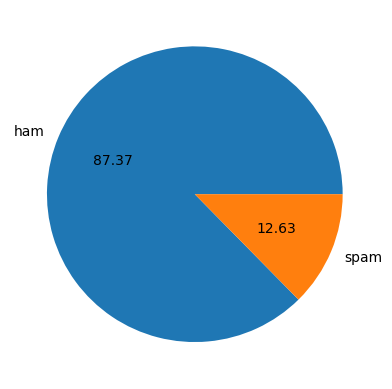

In [228]:
import matplotlib.pyplot as plt #importing pytorch 
plt.pie(df['target'].value_counts(), labels =['ham','spam'], autopct= "%0.2f")
plt.show()

In [229]:
#Data is imbalanced 

In [230]:
# we'll make different columns to check : the no.of characters in a sms, the no. of words in a sms, no. of sentences in a sms
#Natural Language Tool Kit (library nltk)

In [231]:
import nltk

In [232]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [233]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/6dea3874-a3bb-4375-8ade-
[nltk_data]     3de174a11ff9/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [234]:
#to find the no. of characters used in a sms 
# putting it in a new column

In [235]:
df.loc[:, 'num_characters'] = df['text'].apply(len)

In [236]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [237]:
# Finding the number of words 

In [238]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [239]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [240]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [241]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [242]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [243]:
#ham messages
df[df['target']== 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [244]:
#spam messages
df[df['target']== 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [245]:
import seaborn as sns 

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

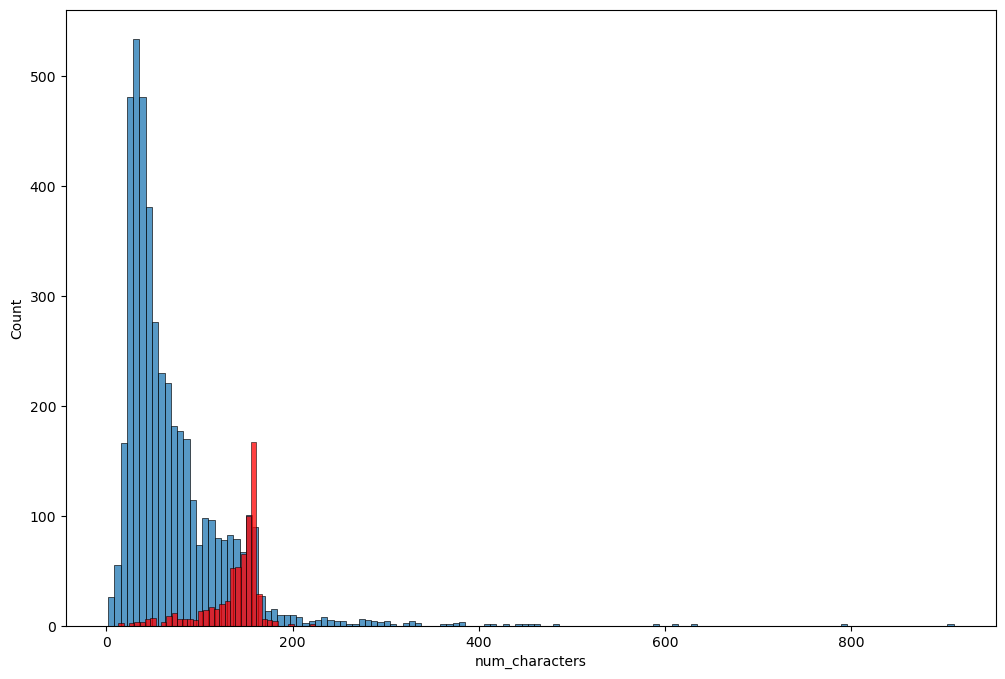

In [246]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target']== 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'], color = 'red')

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

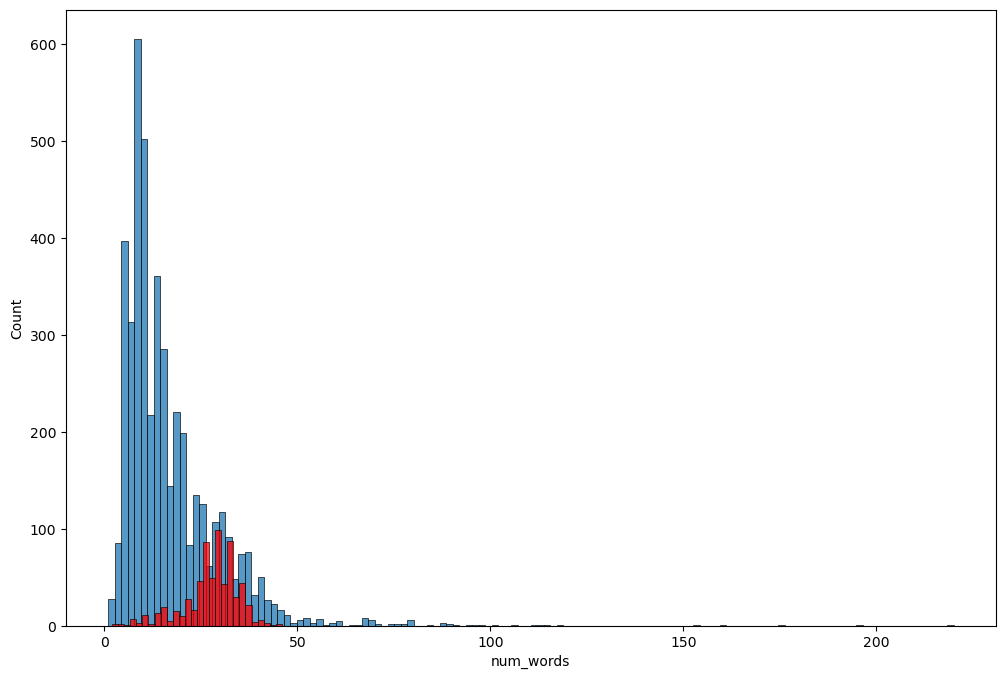

In [247]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target']== 0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'], color = 'red')

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


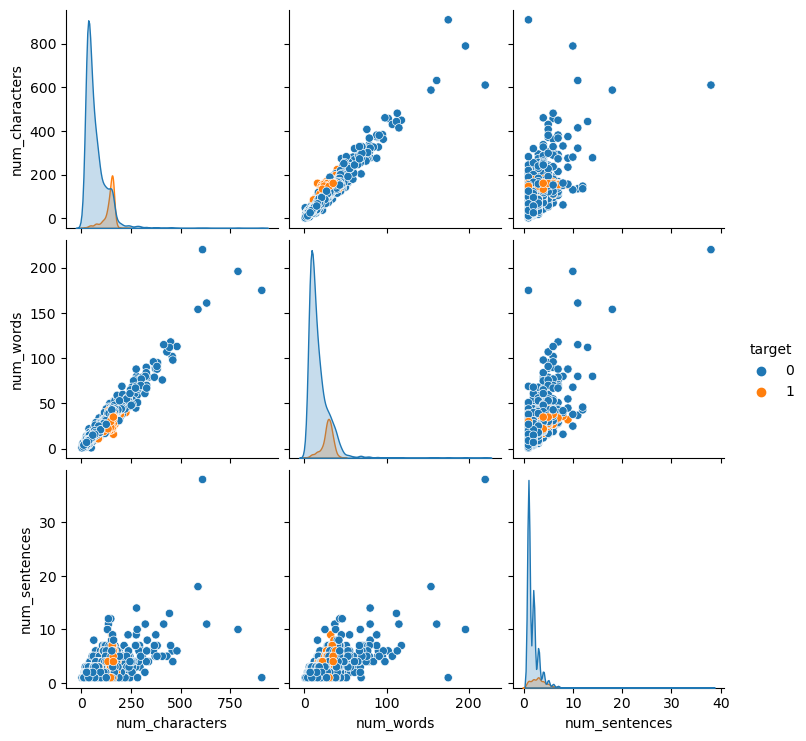

In [248]:
sns.pairplot(df, hue = 'target')

In [249]:
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/6dea3874-a3bb-4375-8ade-
[nltk_data]     3de174a11ff9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [250]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Ensure to download the necessary resources if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = word_tokenize(text)
    
    y = []
    
    # Filter out non-alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)

    # Clear the list y for next use
    text = y[:]
    y.clear()

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))  # Use a set for faster lookup
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)

    # Clear y again for the stemming process
    text = y[:]
    y.clear()

    # Stem the remaining words
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)  # Join the stemmed words into a single string


[nltk_data] Downloading package punkt to
[nltk_data]     /home/6dea3874-a3bb-4375-8ade-
[nltk_data]     3de174a11ff9/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/6dea3874-a3bb-4375-8ade-
[nltk_data]     3de174a11ff9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [251]:
transform_text('I Loved the YT Lecture on ML. How About You? Let Us Know')

'love yt lectur ml let us know'

In [252]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('running')

'run'

In [253]:
df['transformed_text'] = df['text'].apply(transform_text)

In [254]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [255]:
# creating word cloud to highlight the commonly used words in ham and spam data
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [256]:
pip list

Package                                Version
-------------------------------------- ------------
absl-py                                1.4.0
accelerate                             0.21.0
aiobotocore                            2.7.0
aiohttp                                3.9.3
aioitertools                           0.7.1
aiosignal                              1.2.0
alabaster                              0.7.12
altair                                 5.0.1
anaconda-catalogs                      0.2.0
annotated-types                        0.6.0
anyio                                  4.2.0
appdirs                                1.4.4
argon2-cffi                            21.3.0
argon2-cffi-bindings                   21.2.0
arrow                                  1.2.3
astroid                                2.14.2
astropy                                5.3.4
asttokens                              2.0.5
astunparse                             1.6.3
async-lru                              2.

In [257]:
import sys
print(sys.executable)


/opt/conda/envs/anaconda-ai-2024.04-py310/bin/python


In [258]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: 
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /home/6dea3874-a3bb-4375-8ade-3de174a11ff9/.local/lib/python3.10/site-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [259]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [260]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

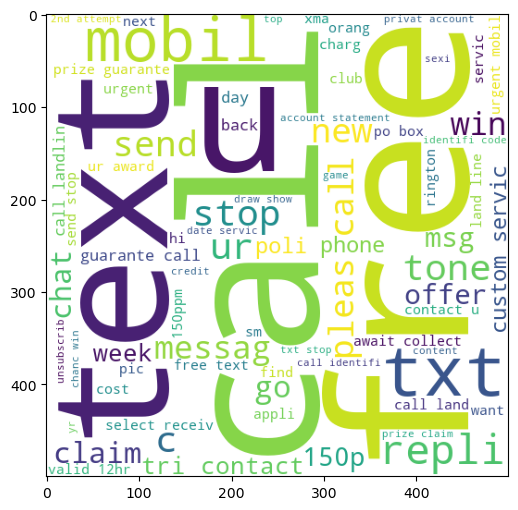

In [261]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [262]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

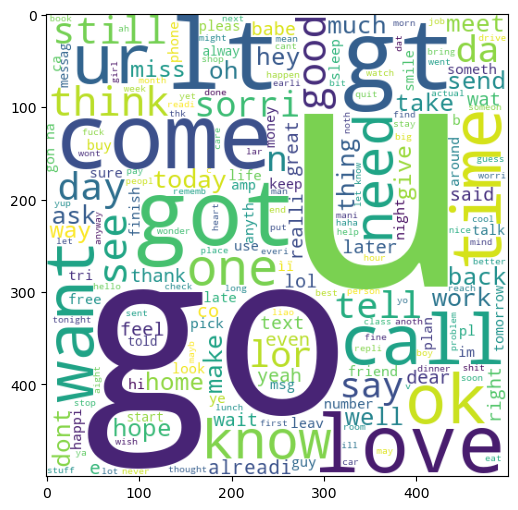

In [263]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [264]:
spam_corpus = []
for msg in df[df[ 'target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [265]:
len(spam_corpus)

9939

<Axes: xlabel='Word', ylabel='Count'>

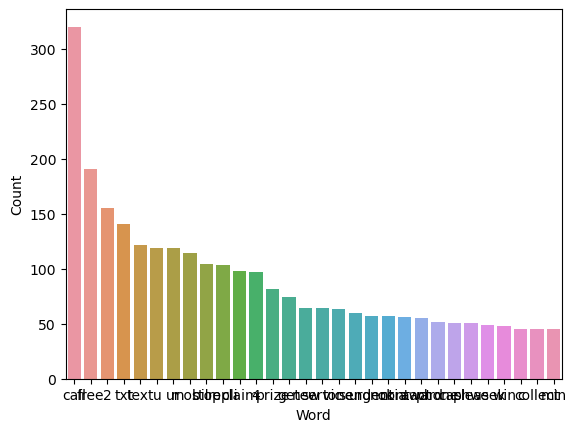

In [266]:
from collections import Counter
spam_data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create the barplot
sns.barplot(x='Word', y='Count', data=spam_data)

In [267]:
ham_corpus = []
for msg in df[df[ 'target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [268]:
len(ham_corpus)

35404

<Axes: xlabel='Word', ylabel='Count'>

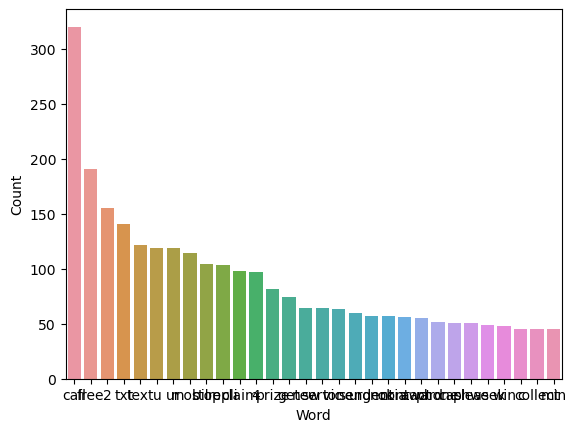

In [269]:
from collections import Counter
ham_data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Create the barplot
sns.barplot(x='Word', y='Count', data=spam_data)

In [270]:
#MODEL BUILDING 
#1. Need to convert text to number -> vector (Bag of words, )

In [271]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000) #experimenting by making max_features = 3000

In [272]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [273]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [274]:
# appending the num_character col to X
#X = np.hstack((X,df[ 'num_characters'].values.reshape (-1,1)))

In [275]:
X.shape

(5169, 3000)

In [276]:
y = df['target'].values

In [277]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [280]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB #importing algorithms from naive bayes
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [281]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [282]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [283]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [284]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [285]:
#tfidf --> mnb 
# compare all the ML algorithms with tfidf and mnb 

In [286]:
conda install -c conda-forge xgboost


Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/anaconda-ai-2024.04-py310

  added / updated specs:
    - xgboost


The following NEW packages will be INSTALLED:

  xgboost            pkgs/main/linux-64::xgboost-1.7.6-py310h06a4308_0 

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2024.3.11-~ --> conda-forge::ca-certificates-2025.1.31-hbcca054_0 
  certifi            pkgs/main/linux-64::certifi-2024.2.2-~ --> conda-forge/noarch::certifi-2025.1.31-pyhd8ed1ab_0 




Preparing transaction: done
Verifying transaction: failed

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: /opt/conda/envs/anaconda-ai-2024.04-py310
  uid: 1612568
  gid: 60000



Note: you may need to restart the kernel to use updated packages.


In [287]:
conda install -c conda-forge xgboost


Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/anaconda-ai-2024.04-py310

  added / updated specs:
    - xgboost


The following NEW packages will be INSTALLED:

  xgboost            pkgs/main/linux-64::xgboost-1.7.6-py310h06a4308_0 

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2024.3.11-~ --> conda-forge::ca-certificates-2025.1.31-hbcca054_0 
  certifi            pkgs/main/linux-64::certifi-2024.2.2-~ --> conda-forge/noarch::certifi-2025.1.31-pyhd8ed1ab_0 




Preparing transaction: done
Verifying transaction: failed

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: /opt/conda/envs/anaconda-ai-2024.04-py310
  uid: 1612568
  gid: 60000



Note: you may need to restart the kernel to use updated packages.


In [288]:
pip install --user xgboost

Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [290]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l2')  # FIXED
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [291]:
clfs = {
'SVC' : svc,
'KN' : knc,
'NB' : mnb,
'DT' : dtc,
'LR' : lrc,
'RF' : rfc,
'AdaBoost': abc,
'BgC' : bc,
'ETC' : etc,
'GBDT' : gbdt,
'xgb' : xgb
} #Dictionary 

In [292]:

def train_classifier (clf,_train, y_train,X_test, y_test):
    clf. fit(X_train,y_train)
    y_pred = clf. predict(X_test)
    accuracy = accuracy_score (y_test,y_pred)
    precision = precision_score (y_test,y_pred)
    
    return accuracy, precision

In [293]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [294]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)  # Fixed syntax issue


For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.9709864603481625
Precision - 1.0
For DT
Accuracy - 0.9323017408123792
Precision - 0.8333333333333334
For LR
Accuracy - 0.9526112185686654
Precision - 0.978494623655914
For RF
Accuracy - 0.97678916827853
Precision - 0.975
For AdaBoost
Accuracy - 0.9690522243713733
Precision - 0.9732142857142857
For BgC
Accuracy - 0.9593810444874274
Precision - 0.8692307692307693
For ETC
Accuracy - 0.9777562862669246
Precision - 0.967479674796748
For GBDT
Accuracy - 0.9506769825918762
Precision - 0.9306930693069307
For xgb
Accuracy - 0.9680851063829787
Precision - 0.9338842975206612


In [295]:
performance_df = pd. DataFrame({ 'Algorithm' :clfs. keys(), 'Accuracy' :accuracy_scores, 'Precision': precision_scores}).sort_values('Accuracy', ascending = False)

In [296]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.977756,0.967480
5,RF,0.976789,0.975000
0,SVC,0.975822,0.974790
2,NB,0.970986,1.000000
6,AdaBoost,0.969052,0.973214
10,xgb,0.968085,0.933884
7,BgC,0.959381,0.869231
4,LR,0.952611,0.978495
9,GBDT,0.950677,0.930693
3,DT,0.932302,0.833333


In [297]:
#improve model performance 
# 1. Change the max_features parameter of TfIdf

In [298]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [299]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.977756
1,RF,Accuracy,0.976789
2,SVC,Accuracy,0.975822
3,NB,Accuracy,0.970986
4,AdaBoost,Accuracy,0.969052
5,xgb,Accuracy,0.968085
6,BgC,Accuracy,0.959381
7,LR,Accuracy,0.952611
8,GBDT,Accuracy,0.950677
9,DT,Accuracy,0.932302


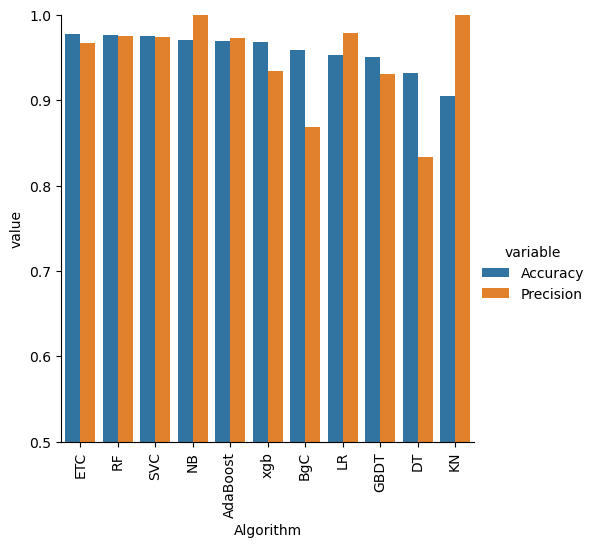

In [300]:
sns.catplot(x = 'Algorithm',y='value',hue = 'variable', data=performance_df1, kind='bar' ,height=5)
plt.ylim (0.5,1.0)
plt.xticks(rotation ='vertical')
plt.show()

In [301]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))
